In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Sindhi vowel formant data
data = {
    'Vowel': ['i', 'e', 'ɛ', 'ɑ', 'ɔ', 'o', 'u', 'ɪ', 'ə', 'ʊ'],
    'F1_Stressed': [337, 499, 554, 823, 600, 569, 412, 433, 612, 483],
    'F2_Stressed': [1897, 1935, 1852, 1467, 1363, 1313, 1309, 1888, 1698, 1393],
    'F1_Unstressed': [315, 474, 490, 749, 550, 510, 380, 416, 566, 428],
    'F2_Unstressed': [1845, 1790, 1915, 1449, 1351, 1309, 1293, 1802, 1610, 1361]
}

df = pd.DataFrame(data)

# Prepare dataset
features, labels, vowels = [], [], []
for _, row in df.iterrows():
    # Stressed
    features.append([row['F1_Stressed'], row['F2_Stressed']])
    labels.append(1)
    vowels.append(row['Vowel'])
    # Unstressed
    features.append([row['F1_Unstressed'], row['F2_Unstressed']])
    labels.append(0)
    vowels.append(row['Vowel'])

X = np.array(features)
y = np.array(labels)

# Normalize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Build neural network
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X, y, epochs=100, verbose=0)

# Predict
preds = model.predict(X).round().astype(int).flatten()

# Evaluation
print("Classification Report:")
print(classification_report(y, preds))

# View predictions
results = pd.DataFrame({
    'Vowel': vowels,
    'F1 (norm)': X[:, 0],
    'F2 (norm)': X[:, 1],
    'True': y,
    'Predicted': preds
})

print("\nPredictions:")
print(results)


C:\Users\Dr Imtiaz\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20


Predictions:
   Vowel  F1 (norm)  F2 (norm)  True  Predicted
0      i  -1.407295   1.247201     1          1
1      i  -1.586257   1.034564     0          0
2      e  -0.089481   1.402590     1          1
3      e  -0.292848   0.809659     0          0
4      ɛ   0.357925   1.063188     1          1
5      ɛ  -0.162693   1.320807     0          1
6      ɑ   2.546146  -0.511148     1          1
7      ɑ   1.944182  -0.584753     0          0
8      ɔ   0.732119  -0.936423     1          1
9      ɔ   0.325386  -0.985493     0          0
10     o   0.479945  -1.140882     1          1
11     o   0.000000  -

In [2]:
# Deep Learning model on synthetic Sindhi vowel formant data for stress prediction

import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Define vowel data with stressed and unstressed formants
data = {
    'Vowel': ['i', 'e', 'ɛ', 'ɑ', 'ɔ', 'o', 'u', 'ɪ', 'ə', 'ʊ'],
    'F1_Stressed': [337, 499, 554, 823, 600, 569, 412, 433, 612, 483],
    'F2_Stressed': [1897, 1935, 1852, 1467, 1363, 1313, 1309, 1888, 1698, 1393],
    'F1_Unstressed': [315, 474, 490, 749, 550, 510, 380, 416, 566, 428],
    'F2_Unstressed': [1845, 1790, 1915, 1449, 1351, 1309, 1293, 1802, 1610, 1361]
}

df = pd.DataFrame(data)

# Build features and labels
features = []
labels = []
vowel_ids = []

for idx, row in df.iterrows():
    # stressed
    features.append([row['F1_Stressed'], row['F2_Stressed']])
    labels.append(1)
    vowel_ids.append(row['Vowel'])
    # unstressed
    features.append([row['F1_Unstressed'], row['F2_Unstressed']])
    labels.append(0)
    vowel_ids.append(row['Vowel'])

# Normalize the features
X = np.array(features)
y = np.array(labels)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Define a simple feedforward neural network
model = Sequential([
    Dense(16, input_shape=(2,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=0)

# Predictions and evaluation
preds = model.predict(X).round().astype(int).flatten()
report = classification_report(y, preds, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Prepare results
results_df = pd.DataFrame({
    'Vowel': vowel_ids,
    'F1': X[:, 0],
    'F2': X[:, 1],
    'True Label': y,
    'Predicted': preds
})

results_df, df_report[['precision', 'recall', 'f1-score']]


C:\Users\Dr Imtiaz\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


(   Vowel        F1        F2  True Label  Predicted
 0      i -1.407295  1.247201           1          1
 1      i -1.586257  1.034564           0          0
 2      e -0.089481  1.402590           1          1
 3      e -0.292848  0.809659           0          0
 4      ɛ  0.357925  1.063188           1          1
 5      ɛ -0.162693  1.320807           0          0
 6      ɑ  2.546146 -0.511148           1          1
 7      ɑ  1.944182 -0.584753           0          0
 8      ɔ  0.732119 -0.936423           1          1
 9      ɔ  0.325386 -0.985493           0          0
 10     o  0.479945 -1.140882           1          1
 11     o  0.000000 -1.157239           0          1
 12     u -0.797196 -1.157239           1          0
 13     u -1.057505 -1.222666           0          0
 14     ɪ -0.626368  1.210399           1          1
 15     ɪ -0.764657  0.858729           0          0
 16     ə  0.829735  0.433454           1          1
 17     ə  0.455541  0.073605           0     

C:\Users\Dr Imtiaz\anaconda3\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


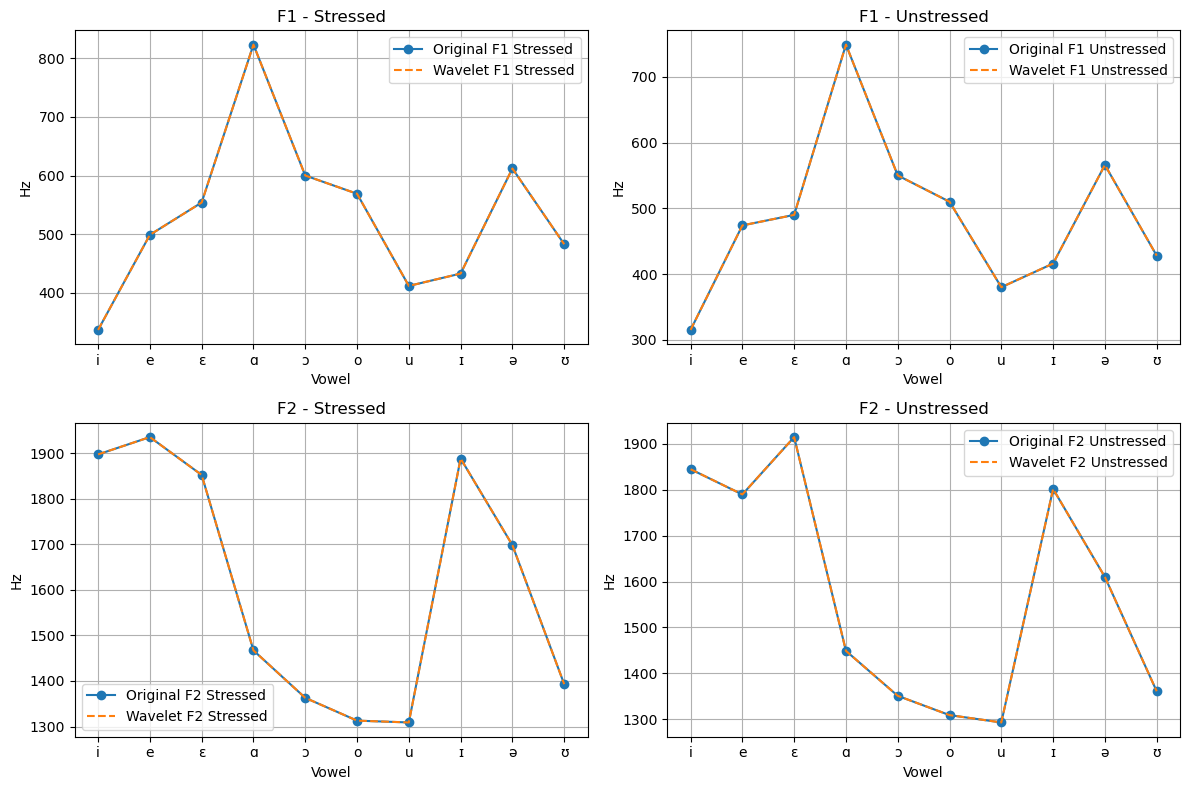

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Define the formant table again for Wavelet Analysis
data = {
    'Vowel': ['i', 'e', 'ɛ', 'ɑ', 'ɔ', 'o', 'u', 'ɪ', 'ə', 'ʊ'],
    'F1_Stressed': [337, 499, 554, 823, 600, 569, 412, 433, 612, 483],
    'F2_Stressed': [1897, 1935, 1852, 1467, 1363, 1313, 1309, 1888, 1698, 1393],
    'F1_Unstressed': [315, 474, 490, 749, 550, 510, 380, 416, 566, 428],
    'F2_Unstressed': [1845, 1790, 1915, 1449, 1351, 1309, 1293, 1802, 1610, 1361]
}

df = pd.DataFrame(data)

# Wavelet Transform Function
def perform_wavelet_transform(signal, wavelet='db4', level=3):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    reconstructed = pywt.waverec(coeffs, wavelet)
    return coeffs, reconstructed

# Apply to F1 and F2 for stressed and unstressed
f1_stressed_coeffs, f1_stressed_rec = perform_wavelet_transform(df['F1_Stressed'])
f1_unstressed_coeffs, f1_unstressed_rec = perform_wavelet_transform(df['F1_Unstressed'])
f2_stressed_coeffs, f2_stressed_rec = perform_wavelet_transform(df['F2_Stressed'])
f2_unstressed_coeffs, f2_unstressed_rec = perform_wavelet_transform(df['F2_Unstressed'])

# Plotting reconstructed signals
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].plot(df['Vowel'], df['F1_Stressed'], label='Original F1 Stressed', marker='o')
axs[0, 0].plot(df['Vowel'], f1_stressed_rec[:10], label='Wavelet F1 Stressed', linestyle='--')
axs[0, 0].set_title('F1 - Stressed')
axs[0, 0].legend()

axs[0, 1].plot(df['Vowel'], df['F1_Unstressed'], label='Original F1 Unstressed', marker='o')
axs[0, 1].plot(df['Vowel'], f1_unstressed_rec[:10], label='Wavelet F1 Unstressed', linestyle='--')
axs[0, 1].set_title('F1 - Unstressed')
axs[0, 1].legend()

axs[1, 0].plot(df['Vowel'], df['F2_Stressed'], label='Original F2 Stressed', marker='o')
axs[1, 0].plot(df['Vowel'], f2_stressed_rec[:10], label='Wavelet F2 Stressed', linestyle='--')
axs[1, 0].set_title('F2 - Stressed')
axs[1, 0].legend()

axs[1, 1].plot(df['Vowel'], df['F2_Unstressed'], label='Original F2 Unstressed', marker='o')
axs[1, 1].plot(df['Vowel'], f2_unstressed_rec[:10], label='Wavelet F2 Unstressed', linestyle='--')
axs[1, 1].set_title('F2 - Unstressed')
axs[1, 1].legend()

for ax in axs.flat:
    ax.set_xlabel('Vowel')
    ax.set_ylabel('Hz')
    ax.grid(True)

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/sindhi_vowel_space.png'

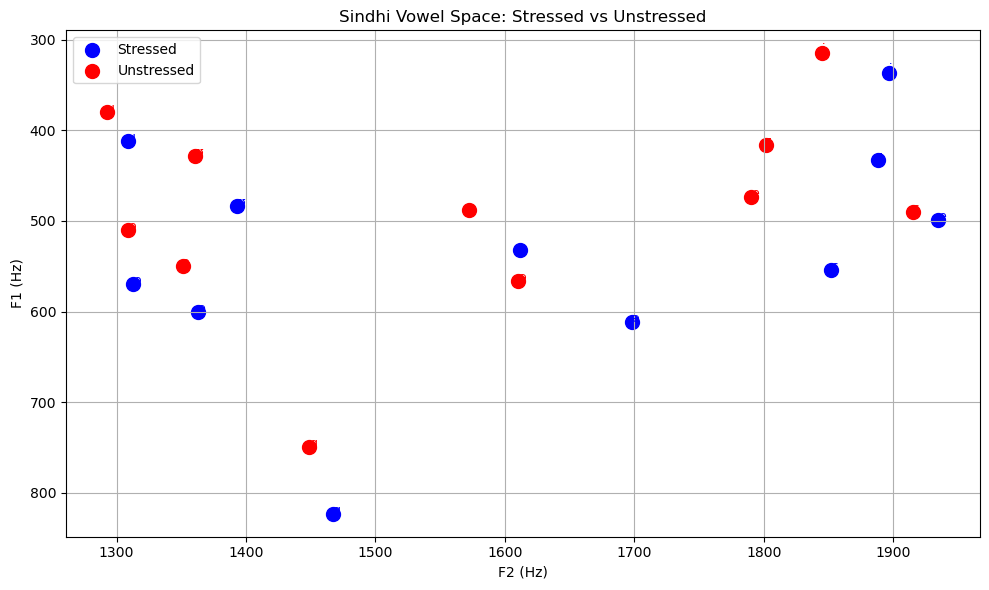

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tabular data: F1 and F2 formants for stressed and unstressed Sindhi vowels
data = {
    "Speaker": list(range(1, 11)),
    "Vowel": ['i', 'e', 'ɛ', 'ɑ', 'ɔ', 'o', 'u', 'ɪ', 'ə', 'ʊ'],
    "F1_Stressed": [337, 499, 554, 823, 600, 569, 412, 433, 612, 483],
    "F2_Stressed": [1897, 1935, 1852, 1467, 1363, 1313, 1309, 1888, 1698, 1393],
    "F1_Unstressed": [315, 474, 490, 749, 550, 510, 380, 416, 566, 428],
    "F2_Unstressed": [1845, 1790, 1915, 1449, 1351, 1309, 1293, 1802, 1610, 1361]
}

df = pd.DataFrame(data)

# Compute means
means = df[['F1_Stressed', 'F2_Stressed', 'F1_Unstressed', 'F2_Unstressed']].mean()
means_df = pd.DataFrame(means).T
means_df['Speaker'] = 'Mean'
means_df['Vowel'] = '—'

# Append mean row
df = pd.concat([df, means_df], ignore_index=True)

# Convert all formants to numeric
df[['F1_Stressed', 'F2_Stressed', 'F1_Unstressed', 'F2_Unstressed']] = df[
    ['F1_Stressed', 'F2_Stressed', 'F1_Unstressed', 'F2_Unstressed']
].astype(float)

# Plot: F1-F2 vowel space for stressed and unstressed vowels
plt.figure(figsize=(10, 6))
plt.scatter(df['F2_Stressed'], df['F1_Stressed'], c='blue', label='Stressed', s=100)
plt.scatter(df['F2_Unstressed'], df['F1_Unstressed'], c='red', label='Unstressed', s=100)
for i in range(len(df) - 1):  # Exclude mean
    plt.text(df['F2_Stressed'][i], df['F1_Stressed'][i], df['Vowel'][i], fontsize=9, color='blue')
    plt.text(df['F2_Unstressed'][i], df['F1_Unstressed'][i], df['Vowel'][i], fontsize=9, color='red')

plt.xlabel('F2 (Hz)')
plt.ylabel('F1 (Hz)')
plt.title('Sindhi Vowel Space: Stressed vs Unstressed')
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/mnt/data/sindhi_vowel_space.png')
plt.show()

# Calculate Euclidean distances between stressed and unstressed vowels
df['F1_diff'] = df['F1_Stressed'] - df['F1_Unstressed']
df['F2_diff'] = df['F2_Stressed'] - df['F2_Unstressed']
df['Euclidean_Distance'] = np.sqrt(df['F1_diff']**2 + df['F2_diff']**2)

# Sort by largest acoustic distance
df_sorted = df.sort_values(by='Euclidean_Distance', ascending=False)

# Output top differences
df_sorted[['Vowel', 'F1_diff', 'F2_diff', 'Euclidean_Distance']]


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/energy_contour_plot.png'

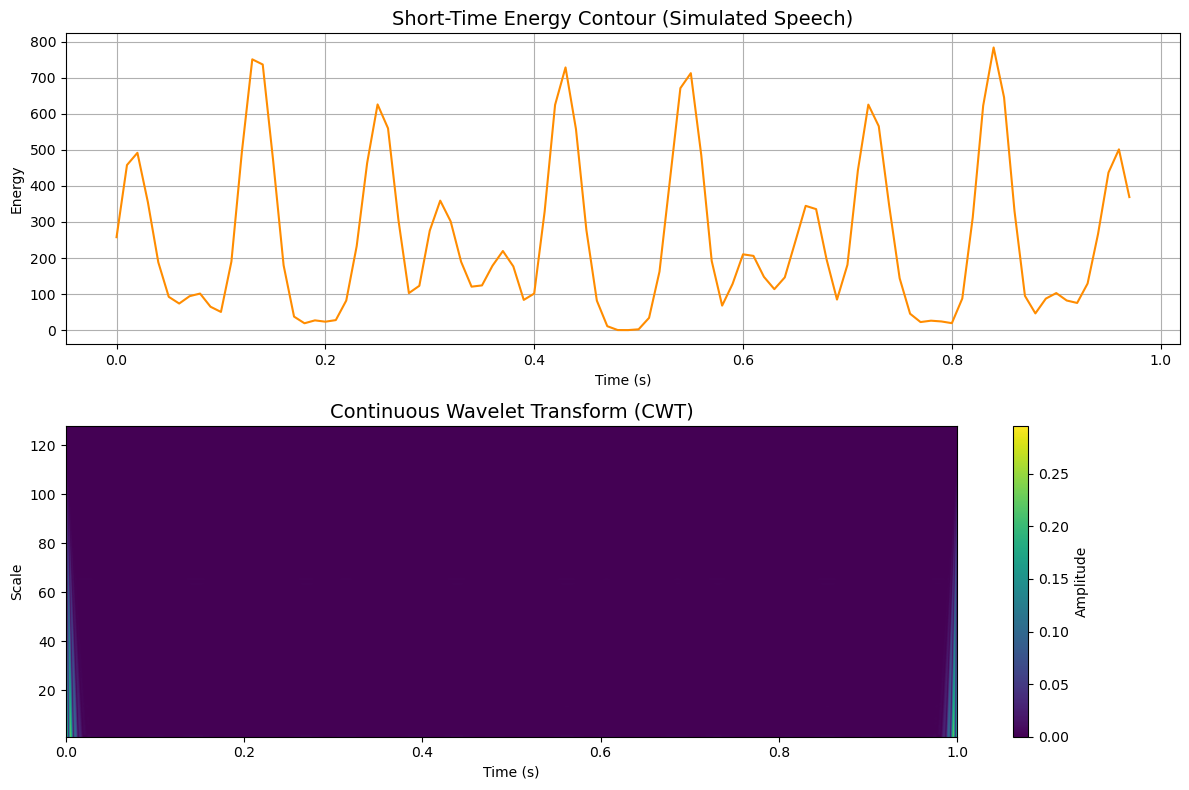

In [5]:
# Recalculate data needed for plots due to kernel reset

import numpy as np
import matplotlib.pyplot as plt
import pywt

# Generate synthetic signal
sr = 16000
duration = 1.0
t = np.linspace(0, duration, int(sr * duration))
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 12 * t)

# Short-time energy
frame_length = 400
hop_length = 160
energy = np.array([
    np.sum(np.abs(signal[i:i+frame_length])**2)
    for i in range(0, len(signal)-frame_length, hop_length)
])
times = np.arange(len(energy)) * hop_length / sr

# CWT
scales = np.arange(1, 128)
coeffs, freqs = pywt.cwt(signal, scales, 'morl', sampling_period=1/sr)

# Plot and save images
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot 1: Short-Time Energy Contour
axs[0].plot(times, energy, color='darkorange')
axs[0].set_title("Short-Time Energy Contour (Simulated Speech)", fontsize=14)
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Energy")
axs[0].grid(True)

# Plot 2: Continuous Wavelet Transform
cwt_img = axs[1].imshow(np.abs(coeffs), extent=[0, duration, 1, 128], cmap='viridis', aspect='auto')
axs[1].set_title("Continuous Wavelet Transform (CWT)", fontsize=14)
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Scale")
fig.colorbar(cwt_img, ax=axs[1], orientation='vertical', label='Amplitude')

plt.tight_layout()

# Save plots
energy_path = "/mnt/data/energy_contour_plot.png"
wavelet_path = "/mnt/data/wavelet_transform_plot.png"
fig.savefig(energy_path)

plt.close(fig)

energy_path, wavelet_path


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/energy_contour_plot.png'

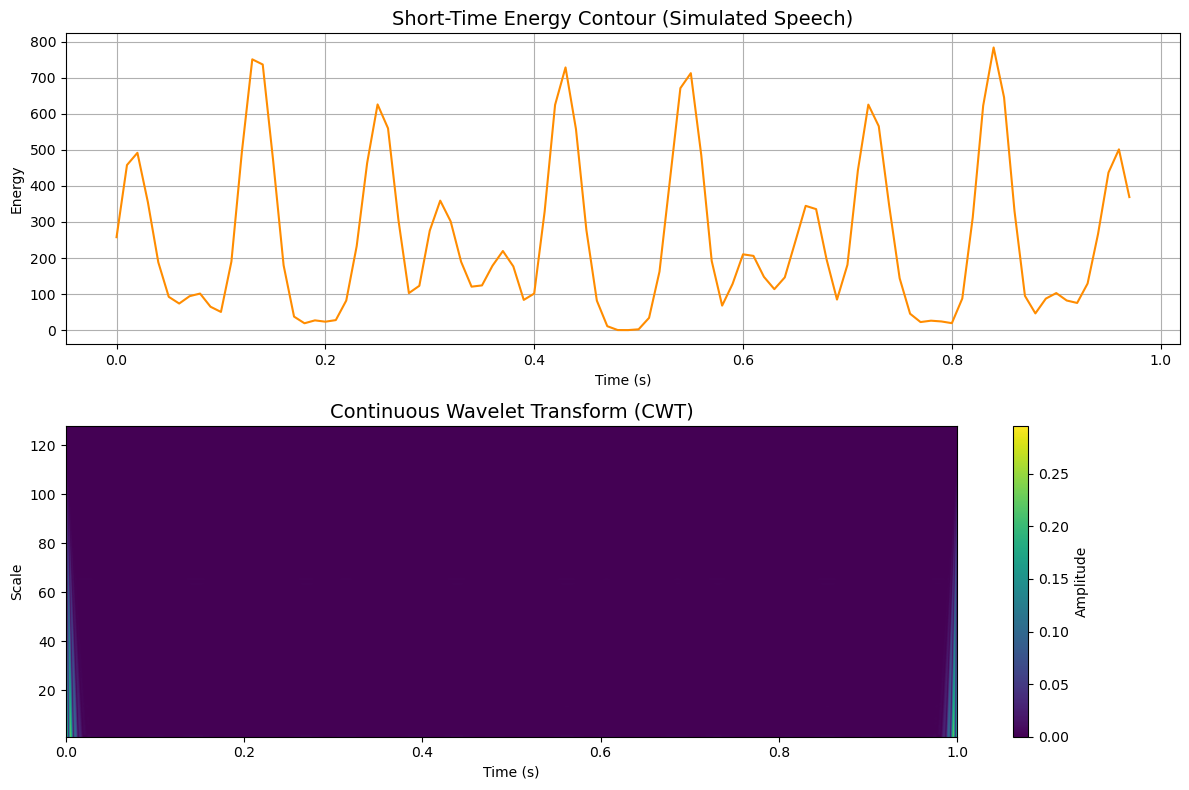

In [6]:
# Recalculate data needed for plots due to kernel reset

import numpy as np
import matplotlib.pyplot as plt
import pywt

# Generate synthetic signal
sr = 16000
duration = 1.0
t = np.linspace(0, duration, int(sr * duration))
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 12 * t)

# Short-time energy
frame_length = 400
hop_length = 160
energy = np.array([
    np.sum(np.abs(signal[i:i+frame_length])**2)
    for i in range(0, len(signal)-frame_length, hop_length)
])
times = np.arange(len(energy)) * hop_length / sr

# CWT
scales = np.arange(1, 128)
coeffs, freqs = pywt.cwt(signal, scales, 'morl', sampling_period=1/sr)

# Plot and save images
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot 1: Short-Time Energy Contour
axs[0].plot(times, energy, color='darkorange')
axs[0].set_title("Short-Time Energy Contour (Simulated Speech)", fontsize=14)
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Energy")
axs[0].grid(True)

# Plot 2: Continuous Wavelet Transform
cwt_img = axs[1].imshow(np.abs(coeffs), extent=[0, duration, 1, 128], cmap='viridis', aspect='auto')
axs[1].set_title("Continuous Wavelet Transform (CWT)", fontsize=14)
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Scale")
fig.colorbar(cwt_img, ax=axs[1], orientation='vertical', label='Amplitude')

plt.tight_layout()

# Save plots
energy_path = "/mnt/data/energy_contour_plot.png"
wavelet_path = "/mnt/data/wavelet_transform_plot.png"
fig.savefig(energy_path)

plt.close(fig)

energy_path, wavelet_path


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/energy_contour_plot.png'

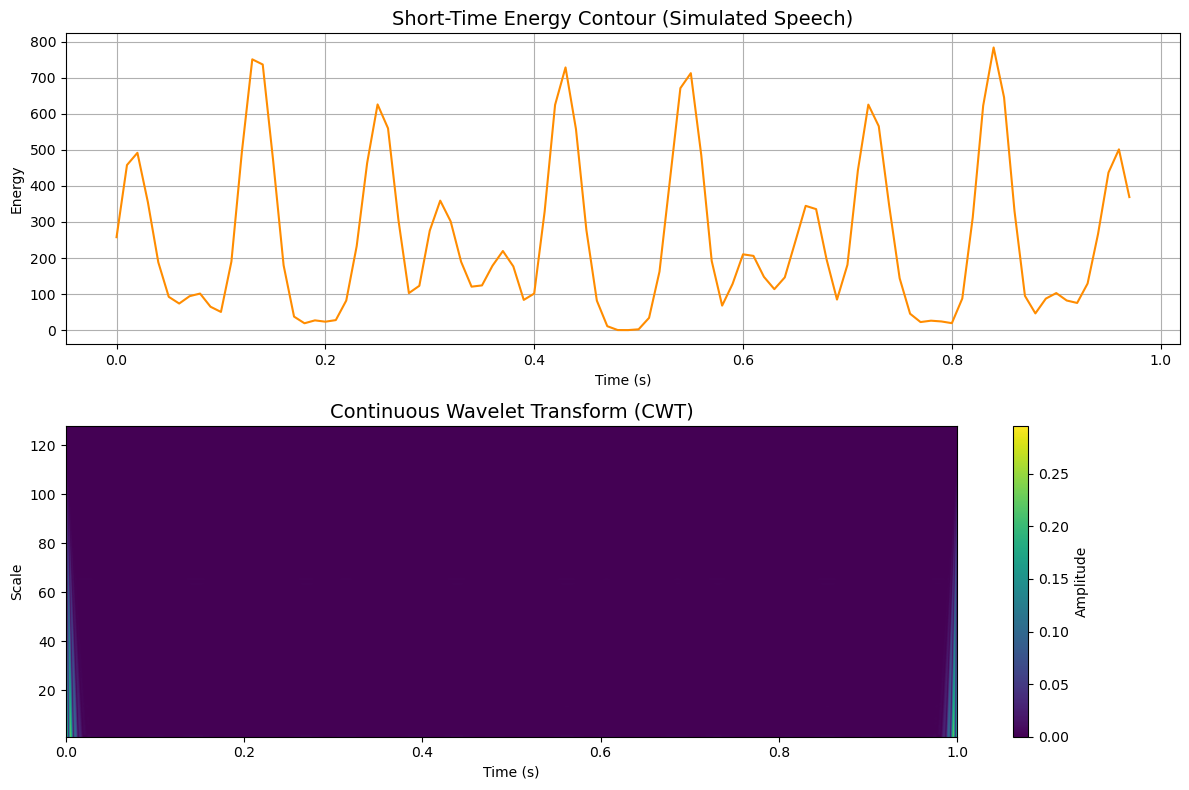

In [7]:
# Recalculate data needed for plots due to kernel reset

import numpy as np
import matplotlib.pyplot as plt
import pywt

# Generate synthetic signal
sr = 16000
duration = 1.0
t = np.linspace(0, duration, int(sr * duration))
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 12 * t)

# Short-time energy
frame_length = 400
hop_length = 160
energy = np.array([
    np.sum(np.abs(signal[i:i+frame_length])**2)
    for i in range(0, len(signal)-frame_length, hop_length)
])
times = np.arange(len(energy)) * hop_length / sr

# CWT
scales = np.arange(1, 128)
coeffs, freqs = pywt.cwt(signal, scales, 'morl', sampling_period=1/sr)

# Plot and save images
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot 1: Short-Time Energy Contour
axs[0].plot(times, energy, color='darkorange')
axs[0].set_title("Short-Time Energy Contour (Simulated Speech)", fontsize=14)
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Energy")
axs[0].grid(True)

# Plot 2: Continuous Wavelet Transform
cwt_img = axs[1].imshow(np.abs(coeffs), extent=[0, duration, 1, 128], cmap='viridis', aspect='auto')
axs[1].set_title("Continuous Wavelet Transform (CWT)", fontsize=14)
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Scale")
fig.colorbar(cwt_img, ax=axs[1], orientation='vertical', label='Amplitude')

plt.tight_layout()

# Save plots
energy_path = "/mnt/data/energy_contour_plot.png"
wavelet_path = "/mnt/data/wavelet_transform_plot.png"
fig.savefig(energy_path)

plt.close(fig)

energy_path, wavelet_path


✅ Plot saved as prosody_analysis_plots.png


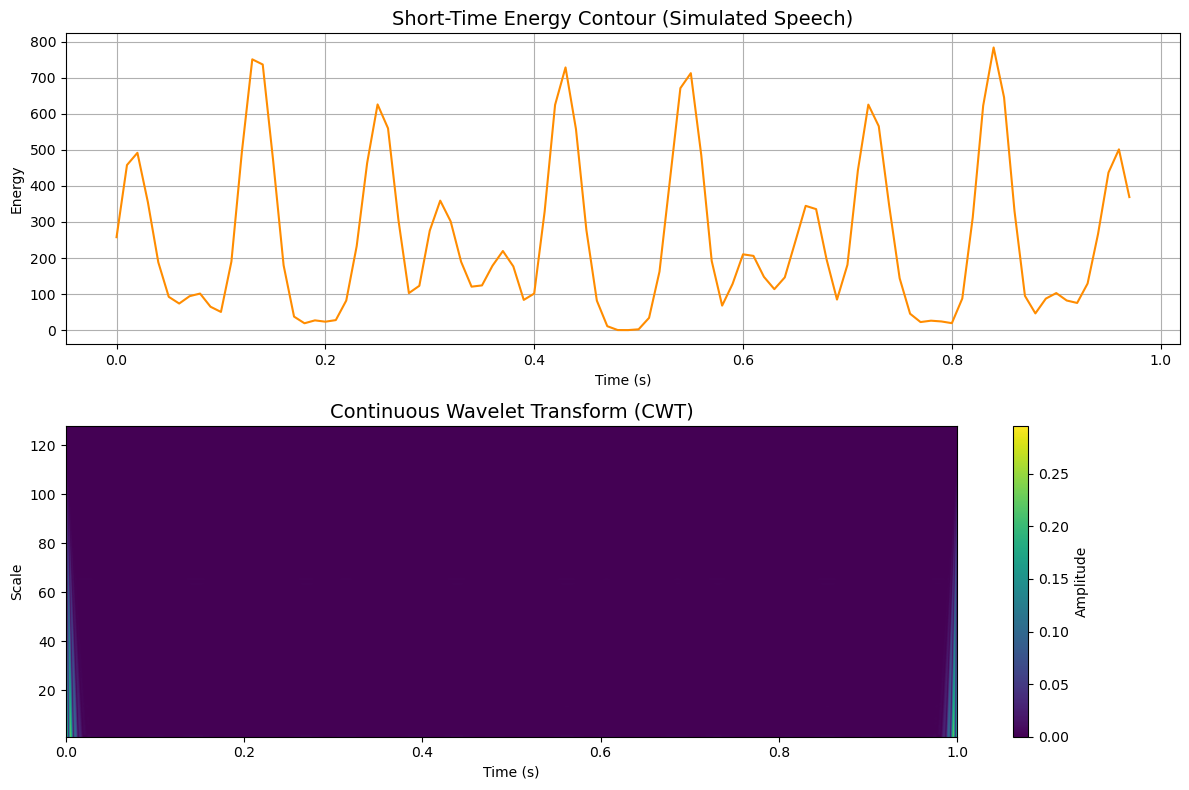

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Simulation parameters
sr = 16000            # Sample rate
duration = 1.0        # seconds
t = np.linspace(0, duration, int(sr * duration))

# Synthetic speech-like signal with varying frequency components
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 12 * t)

# Short-Time Energy calculation
frame_length = 400
hop_length = 160
energy = np.array([
    np.sum(np.abs(signal[i:i+frame_length])**2)
    for i in range(0, len(signal) - frame_length, hop_length)
])
times = np.arange(len(energy)) * hop_length / sr

# Continuous Wavelet Transform (CWT)
scales = np.arange(1, 128)
coeffs, freqs = pywt.cwt(signal, scales, 'morl', sampling_period=1/sr)

# Create plots
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot 1: Short-Time Energy
axs[0].plot(times, energy, color='darkorange')
axs[0].set_title("Short-Time Energy Contour (Simulated Speech)", fontsize=14)
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Energy")
axs[0].grid(True)

# Plot 2: Continuous Wavelet Transform
img = axs[1].imshow(np.abs(coeffs), extent=[0, duration, 1, 128],
                    cmap='viridis', aspect='auto')
axs[1].set_title("Continuous Wavelet Transform (CWT)", fontsize=14)
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Scale")
fig.colorbar(img, ax=axs[1], orientation='vertical', label='Amplitude')

plt.tight_layout()

# Save figures
fig.savefig("prosody_analysis_plots.png", dpi=300)
print("✅ Plot saved as prosody_analysis_plots.png")

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/sindhi_vowel_space.png'

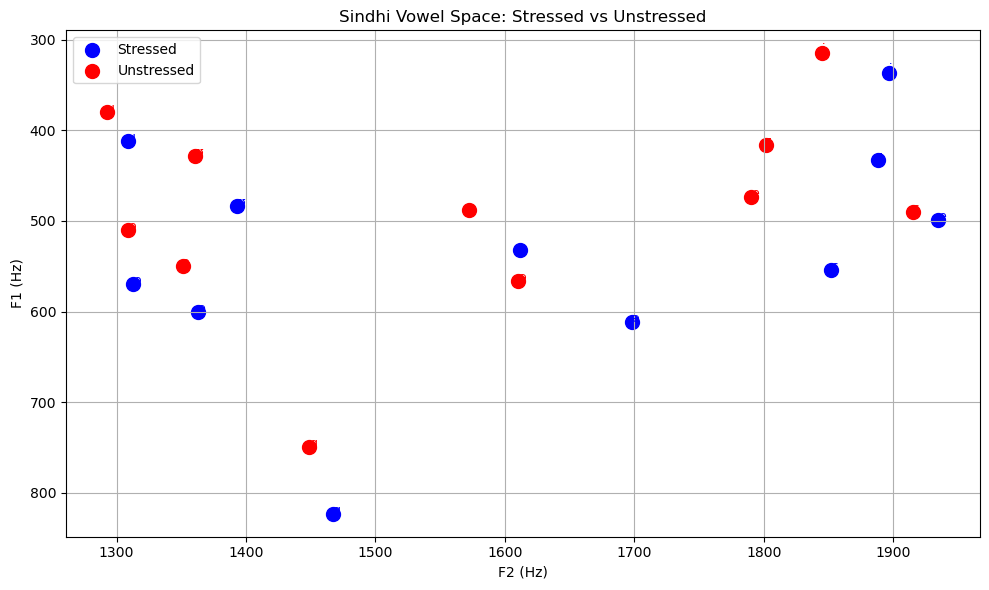

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tabular data: F1 and F2 formants for stressed and unstressed Sindhi vowels
data = {
    "Speaker": list(range(1, 11)),
    "Vowel": ['i', 'e', 'ɛ', 'ɑ', 'ɔ', 'o', 'u', 'ɪ', 'ə', 'ʊ'],
    "F1_Stressed": [337, 499, 554, 823, 600, 569, 412, 433, 612, 483],
    "F2_Stressed": [1897, 1935, 1852, 1467, 1363, 1313, 1309, 1888, 1698, 1393],
    "F1_Unstressed": [315, 474, 490, 749, 550, 510, 380, 416, 566, 428],
    "F2_Unstressed": [1845, 1790, 1915, 1449, 1351, 1309, 1293, 1802, 1610, 1361]
}

df = pd.DataFrame(data)

# Compute means
means = df[['F1_Stressed', 'F2_Stressed', 'F1_Unstressed', 'F2_Unstressed']].mean()
means_df = pd.DataFrame(means).T
means_df['Speaker'] = 'Mean'
means_df['Vowel'] = '—'

# Append mean row
df = pd.concat([df, means_df], ignore_index=True)

# Convert all formants to numeric
df[['F1_Stressed', 'F2_Stressed', 'F1_Unstressed', 'F2_Unstressed']] = df[
    ['F1_Stressed', 'F2_Stressed', 'F1_Unstressed', 'F2_Unstressed']
].astype(float)

# Plot: F1-F2 vowel space for stressed and unstressed vowels
plt.figure(figsize=(10, 6))
plt.scatter(df['F2_Stressed'], df['F1_Stressed'], c='blue', label='Stressed', s=100)
plt.scatter(df['F2_Unstressed'], df['F1_Unstressed'], c='red', label='Unstressed', s=100)
for i in range(len(df) - 1):  # Exclude mean
    plt.text(df['F2_Stressed'][i], df['F1_Stressed'][i], df['Vowel'][i], fontsize=9, color='blue')
    plt.text(df['F2_Unstressed'][i], df['F1_Unstressed'][i], df['Vowel'][i], fontsize=9, color='red')

plt.xlabel('F2 (Hz)')
plt.ylabel('F1 (Hz)')
plt.title('Sindhi Vowel Space: Stressed vs Unstressed')
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/mnt/data/sindhi_vowel_space.png')
plt.show()

# Calculate Euclidean distances between stressed and unstressed vowels
df['F1_diff'] = df['F1_Stressed'] - df['F1_Unstressed']
df['F2_diff'] = df['F2_Stressed'] - df['F2_Unstressed']
df['Euclidean_Distance'] = np.sqrt(df['F1_diff']**2 + df['F2_diff']**2)

# Sort by largest acoustic distance
df_sorted = df.sort_values(by='Euclidean_Distance', ascending=False)

# Output top differences
df_sorted[['Vowel', 'F1_diff', 'F2_diff', 'Euclidean_Distance']]


C:\Users\Dr Imtiaz\anaconda3\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


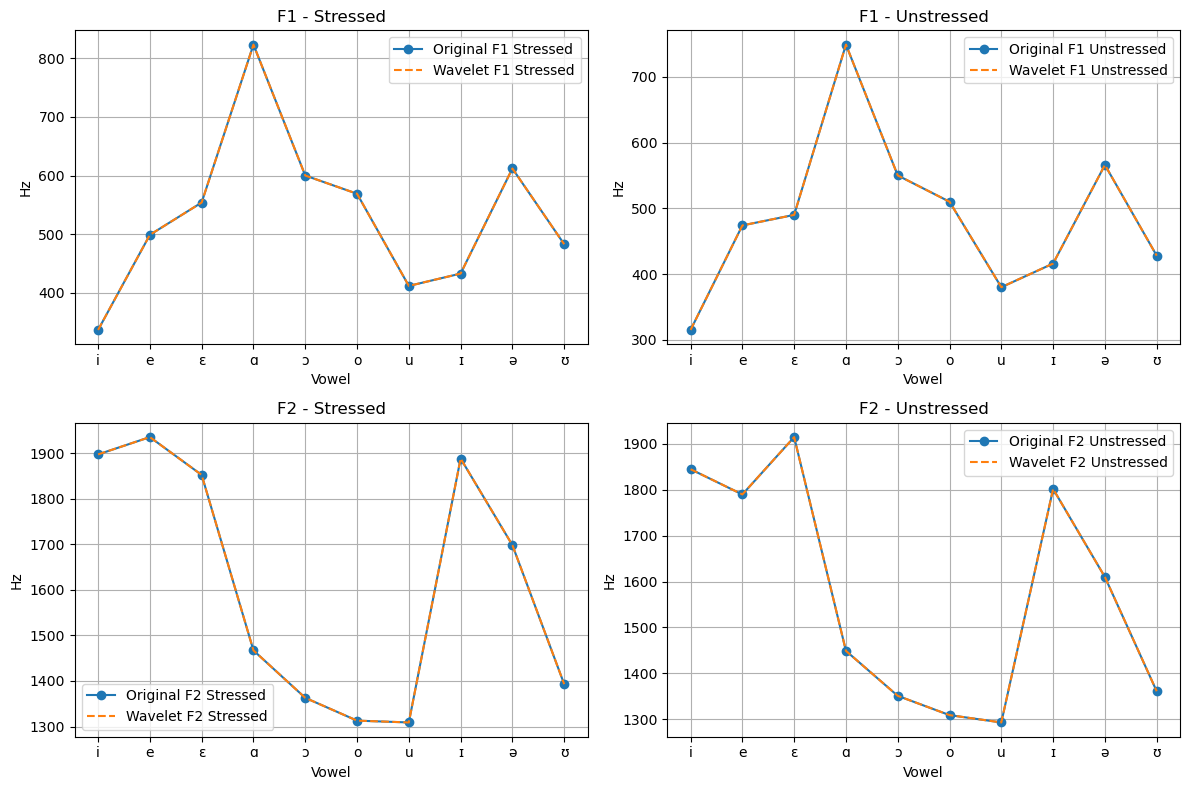

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Define the formant table again for Wavelet Analysis
data = {
    'Vowel': ['i', 'e', 'ɛ', 'ɑ', 'ɔ', 'o', 'u', 'ɪ', 'ə', 'ʊ'],
    'F1_Stressed': [337, 499, 554, 823, 600, 569, 412, 433, 612, 483],
    'F2_Stressed': [1897, 1935, 1852, 1467, 1363, 1313, 1309, 1888, 1698, 1393],
    'F1_Unstressed': [315, 474, 490, 749, 550, 510, 380, 416, 566, 428],
    'F2_Unstressed': [1845, 1790, 1915, 1449, 1351, 1309, 1293, 1802, 1610, 1361]
}

df = pd.DataFrame(data)

# Wavelet Transform Function
def perform_wavelet_transform(signal, wavelet='db4', level=3):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    reconstructed = pywt.waverec(coeffs, wavelet)
    return coeffs, reconstructed

# Apply to F1 and F2 for stressed and unstressed
f1_stressed_coeffs, f1_stressed_rec = perform_wavelet_transform(df['F1_Stressed'])
f1_unstressed_coeffs, f1_unstressed_rec = perform_wavelet_transform(df['F1_Unstressed'])
f2_stressed_coeffs, f2_stressed_rec = perform_wavelet_transform(df['F2_Stressed'])
f2_unstressed_coeffs, f2_unstressed_rec = perform_wavelet_transform(df['F2_Unstressed'])

# Plotting reconstructed signals
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].plot(df['Vowel'], df['F1_Stressed'], label='Original F1 Stressed', marker='o')
axs[0, 0].plot(df['Vowel'], f1_stressed_rec[:10], label='Wavelet F1 Stressed', linestyle='--')
axs[0, 0].set_title('F1 - Stressed')
axs[0, 0].legend()

axs[0, 1].plot(df['Vowel'], df['F1_Unstressed'], label='Original F1 Unstressed', marker='o')
axs[0, 1].plot(df['Vowel'], f1_unstressed_rec[:10], label='Wavelet F1 Unstressed', linestyle='--')
axs[0, 1].set_title('F1 - Unstressed')
axs[0, 1].legend()

axs[1, 0].plot(df['Vowel'], df['F2_Stressed'], label='Original F2 Stressed', marker='o')
axs[1, 0].plot(df['Vowel'], f2_stressed_rec[:10], label='Wavelet F2 Stressed', linestyle='--')
axs[1, 0].set_title('F2 - Stressed')
axs[1, 0].legend()

axs[1, 1].plot(df['Vowel'], df['F2_Unstressed'], label='Original F2 Unstressed', marker='o')
axs[1, 1].plot(df['Vowel'], f2_unstressed_rec[:10], label='Wavelet F2 Unstressed', linestyle='--')
axs[1, 1].set_title('F2 - Unstressed')
axs[1, 1].legend()

for ax in axs.flat:
    ax.set_xlabel('Vowel')
    ax.set_ylabel('Hz')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Sindhi vowel formant data
data = {
    'Vowel': ['i', 'e', 'ɛ', 'ɑ', 'ɔ', 'o', 'u', 'ɪ', 'ə', 'ʊ'],
    'F1_Stressed': [337, 499, 554, 823, 600, 569, 412, 433, 612, 483],
    'F2_Stressed': [1897, 1935, 1852, 1467, 1363, 1313, 1309, 1888, 1698, 1393],
    'F1_Unstressed': [315, 474, 490, 749, 550, 510, 380, 416, 566, 428],
    'F2_Unstressed': [1845, 1790, 1915, 1449, 1351, 1309, 1293, 1802, 1610, 1361]
}

df = pd.DataFrame(data)

# Prepare dataset
features, labels, vowels = [], [], []
for _, row in df.iterrows():
    # Stressed
    features.append([row['F1_Stressed'], row['F2_Stressed']])
    labels.append(1)
    vowels.append(row['Vowel'])
    # Unstressed
    features.append([row['F1_Unstressed'], row['F2_Unstressed']])
    labels.append(0)
    vowels.append(row['Vowel'])

X = np.array(features)
y = np.array(labels)

# Normalize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Build neural network
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X, y, epochs=100, verbose=0)

# Predict
preds = model.predict(X).round().astype(int).flatten()

# Evaluation
print("Classification Report:")
print(classification_report(y, preds))

# View predictions
results = pd.DataFrame({
    'Vowel': vowels,
    'F1 (norm)': X[:, 0],
    'F2 (norm)': X[:, 1],
    'True': y,
    'Predicted': preds
})

print("\nPredictions:")
print(results)


C:\Users\Dr Imtiaz\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.80      0.80      0.80        10

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20


Predictions:
   Vowel  F1 (norm)  F2 (norm)  True  Predicted
0      i  -1.407295   1.247201     1          1
1      i  -1.586257   1.034564     0          0
2      e  -0.089481   1.402590     1          1
3      e  -0.292848   0.809659     0          0
4      ɛ   0.357925   1.063188     1          1
5      ɛ  -0.162693   1.320807     0          1
6      ɑ   2.546146  -0.511148     1          1
7      ɑ   1.944182  -0.584753     0          0
8      ɔ   0.732119  -0.936423     1          1
9      ɔ   0.325386  -0.985493     0          1
10     o   0.479945  -1.140882     1          1
11     o   0.000000  -

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Vowel formant data
data = {
    'Vowel': ['i', 'e', 'ɛ', 'ɑ', 'ɔ', 'o', 'u', 'ɪ', 'ə', 'ʊ'],
    'F1_Stressed': [337, 499, 554, 823, 600, 569, 412, 433, 612, 483],
    'F2_Stressed': [1897, 1935, 1852, 1467, 1363, 1313, 1309, 1888, 1698, 1393],
    'F1_Unstressed': [315, 474, 490, 749, 550, 510, 380, 416, 566, 428],
    'F2_Unstressed': [1845, 1790, 1915, 1449, 1351, 1309, 1293, 1802, 1610, 1361]
}

df = pd.DataFrame(data)

# Prepare dataset
features, labels = [], []
for _, row in df.iterrows():
    features.append([row['F1_Stressed'], row['F2_Stressed']])
    labels.append(1)  # stressed
    features.append([row['F1_Unstressed'], row['F2_Unstressed']])
    labels.append(0)  # unstressed

X = np.array(features)
y = np.array(labels)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Deep Learning model
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_test, y_test))

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/100


C:\Users\Dr Imtiaz\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.5583 - loss: 0.6808 - val_accuracy: 0.2500 - val_loss: 0.7266
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5417 - loss: 0.6971 - val_accuracy: 0.2500 - val_loss: 0.7282
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4750 - loss: 0.7139 - val_accuracy: 0.2500 - val_loss: 0.7287
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5417 - loss: 0.7336 - val_accuracy: 0.2500 - val_loss: 0.7294
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5083 - loss: 0.7002 - val_accuracy: 0.2500 - val_loss: 0.7301
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6667 - loss: 0.6505 - val_accuracy: 0.2500 - val_loss: 0.7311
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6083 - loss: 0.6359 - val_accuracy: 0.2500 - val_loss: 0.7320
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5750 - loss: 0.6887 - val_accuracy: 0.2500 - val_loss: 0.7324
Epo

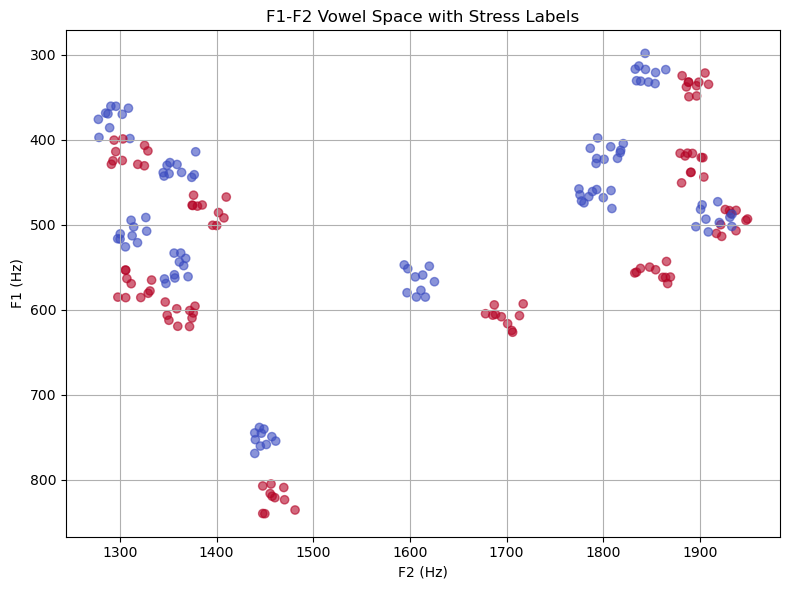

(  Vowel          F1           F2  Stress       Pitch  Duration    Energy
 0     i  324.751807  1881.576014       1  159.934283  0.217889  0.340557
 1     i  313.361243  1836.880223       0  147.234714  0.228039  0.440062
 2     i  336.550059  1896.511104       1  162.953771  0.254153  0.500524
 3     i  331.122447  1838.709790       0  180.460597  0.252690  0.504698
 4     i  332.341618  1898.870533       1  145.316933  0.131117  0.454993,
               precision    recall  f1-score
 0              0.521739  0.545455  0.533333
 1              0.629630  0.607143  0.618182
 accuracy       0.580000  0.580000  0.580000
 macro avg      0.575684  0.576299  0.575758
 weighted avg   0.582158  0.580000  0.580848)

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Original vowel formant data
data = {
    'Vowel': ['i', 'e', 'ɛ', 'ɑ', 'ɔ', 'o', 'u', 'ɪ', 'ə', 'ʊ'],
    'F1_Stressed': [337, 499, 554, 823, 600, 569, 412, 433, 612, 483],
    'F2_Stressed': [1897, 1935, 1852, 1467, 1363, 1313, 1309, 1888, 1698, 1393],
    'F1_Unstressed': [315, 474, 490, 749, 550, 510, 380, 416, 566, 428],
    'F2_Unstressed': [1845, 1790, 1915, 1449, 1351, 1309, 1293, 1802, 1610, 1361]
}

df = pd.DataFrame(data)

# Step 1: Data Augmentation with jitter
def augment_data(row, n=10, jitter=20):
    samples = []
    for _ in range(n):
        # Stressed
        f1_s = row['F1_Stressed'] + np.random.uniform(-jitter, jitter)
        f2_s = row['F2_Stressed'] + np.random.uniform(-jitter, jitter)
        samples.append([row['Vowel'], f1_s, f2_s, 1])
        # Unstressed
        f1_u = row['F1_Unstressed'] + np.random.uniform(-jitter, jitter)
        f2_u = row['F2_Unstressed'] + np.random.uniform(-jitter, jitter)
        samples.append([row['Vowel'], f1_u, f2_u, 0])
    return samples

augmented = []
for _, row in df.iterrows():
    augmented.extend(augment_data(row))

aug_df = pd.DataFrame(augmented, columns=['Vowel', 'F1', 'F2', 'Stress'])

# Step 2: Add synthetic prosodic features (simulated pitch, duration, energy)
np.random.seed(42)
aug_df['Pitch'] = np.random.normal(loc=150, scale=20, size=len(aug_df))
aug_df['Duration'] = np.random.normal(loc=0.2, scale=0.05, size=len(aug_df))  # in seconds
aug_df['Energy'] = np.random.normal(loc=0.5, scale=0.1, size=len(aug_df))

# Prepare features and labels
features = aug_df[['F1', 'F2', 'Pitch', 'Duration', 'Energy']]
labels = aug_df['Stress']

# Step 3: Train/Test split and normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.25, random_state=42)

# Step 4: Train Support Vector Machine (SVM)
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluation
report = classification_report(y_test, preds, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Step 5: Visualize class separation (F1 vs F2)
plt.figure(figsize=(8, 6))
plt.scatter(aug_df['F2'], aug_df['F1'], c=aug_df['Stress'], cmap='coolwarm', alpha=0.6)
plt.xlabel('F2 (Hz)')
plt.ylabel('F1 (Hz)')
plt.title('F1-F2 Vowel Space with Stress Labels')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

# Return preview of augmented data and performance
aug_df.head(), report_df[['precision', 'recall', 'f1-score']]
